In [1]:
from skimage.measure import LineModelND, ransac
from sklearn.linear_model import RANSACRegressor
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
from processUVWLines import processUVWLines
from src.openCSV import openCSV


In [2]:
# This version uses the UVW csv


data_csv_uvw = openCSV(
    "/media/gant/Expansion/tpc_root_raw/DATA_ROOT/uvwcsv/CoBo_2018-06-20T10-51-39.459_0004.csv")

# data_csv_uvw = openCSV("/media/gant/Expansion/tpc_root_raw/DATA_ROOT/uvwcsv/CoBo_2018-06-20T10-51-39.459_0000.csv") #25 314 568

# data_csv_uvw = openCSV("/media/gant/Expansion/tpc_root_raw/DATA_ROOT/uvwcsv/CoBo_2018-06-16T10-18-38.616_0000.csv") #12
data_csv_uvw.readCSV()

entry_nr = 114
singular_entry_uvw = data_csv_uvw.m_data[data_csv_uvw.m_data["entry_nr"] == entry_nr]


if singular_entry_uvw.empty:
    print("The value ", entry_nr, " was not found in the 'entry_nr' column.")
else:
    print("The value ", entry_nr, " was found in the 'entry_nr' column.")


The value  114  was found in the 'entry_nr' column.


In [3]:
# Use RANSAC in 2D to fit a line to the data set. Format is UVW.
line_proc_uvw = processUVWLines(singular_entry_uvw)

print(line_proc_uvw._m_hits)

nr_lines = 2

verbose = True

# Create a figure and subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 10))

model_uvw = line_proc_uvw.fitNLines(axes, nr_lines, True, 2, 1.25)

if (verbose):
    for i in range(len(model_uvw)):
        print("At plane ", model_uvw[i].plane, "The equation is y = ",
              model_uvw[i].slope, " * x + ", model_uvw[i].intercept, "\n")


# Adjust spacing between subplots
plt.tight_layout()


# Display the plot
plt.show()


AttributeError: 'list' object has no attribute 'shape'

At plane  0 The equation is y =  -0.4295534124028027  * x +  116.63591815155036 

At plane  1 The equation is y =  0.3389726307848973  * x +  -35.296059433886214 

At plane  2 The equation is y =  0.42189083439875774  * x +  0.00482825640894204 

At plane  2 The equation is y =  0.35384417113454325  * x +  9.858894900025454 

At plane  2 The equation is y =  0.35384417113454325  * x +  9.858894900025454 

At plane  2 The equation is y =  0.35384417113454325  * x +  9.858894900025454 

At plane  2 The equation is y =  0.35384417113454325  * x +  9.858894900025454 



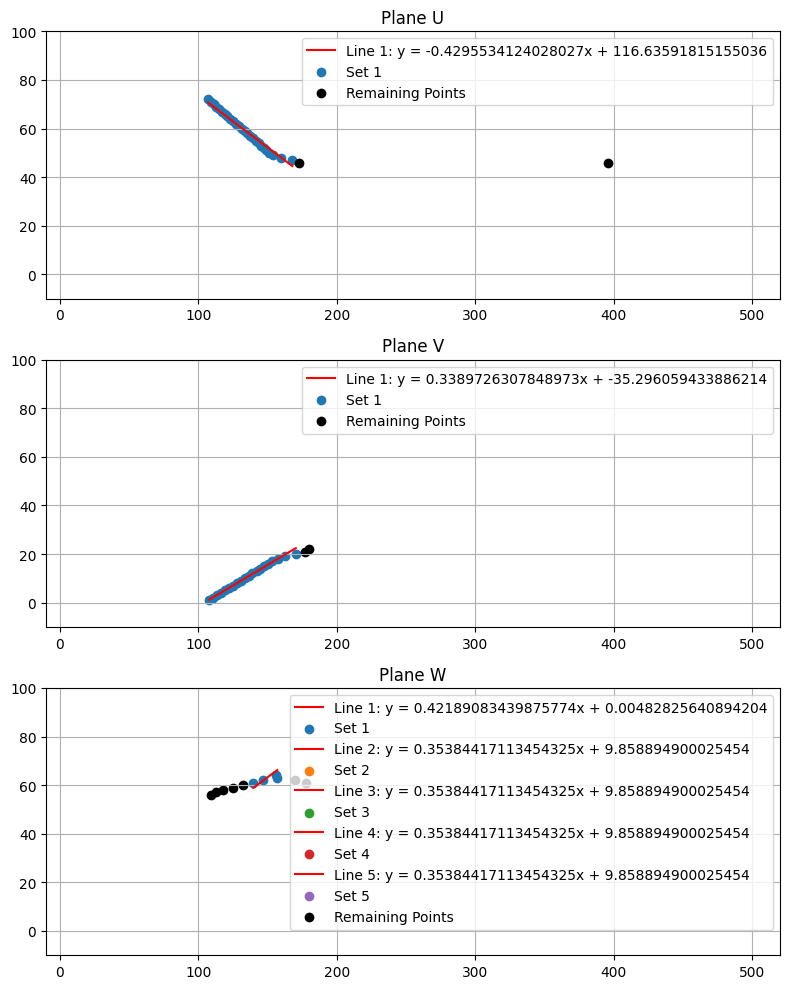

In [84]:
# Use Hough Transform in 2D
line_proc_uvw = processUVWLines(singular_entry_uvw)

nr_lines = 5

verbose = True

# Create a figure and subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 10))

model_hough = line_proc_uvw.fitNLinesHough(axes, nr_lines, True, 3, 2)

if (verbose):
    for i in range(len(model_hough)):
        print("At plane ", model_hough[i].plane, "The equation is y = ",
              model_hough[i].m, " * x + ", model_hough[i].b, "\n")


# Adjust spacing between subplots
plt.tight_layout()


# Display the plot
plt.show()
